# Importing libraries and data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px

In [46]:
gKMymDYV5DRju9-fBhVj

In [47]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,gender,start_year,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,2,2013,9,37,9,2013,9,37,9,18
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,1,2013,9,37,12,2013,9,37,12,18
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,1,2013,9,38,18,2013,9,38,18,19
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,2,2013,9,39,28,2013,9,39,28,12
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,0,2013,9,36,7,2013,9,36,7,18


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  50000 non-null  object        
 1   bike_id                  50000 non-null  int64         
 2   weekday                  50000 non-null  object        
 3   start_hour               50000 non-null  int64         
 4   start_time               50000 non-null  datetime64[ns]
 5   start_station_id         50000 non-null  int64         
 6   start_station_name       50000 non-null  object        
 7   start_station_latitude   50000 non-null  float64       
 8   start_station_longitude  50000 non-null  float64       
 9   end_time                 50000 non-null  datetime64[ns]
 10  end_station_id           50000 non-null  int64         
 11  end_station_name         50000 non-null  object        
 12  end_station_latitude     50000 n

In [ ]:
# preparing dataframe for analysis

In [51]:
df.drop(['trip_id','bike_id','weekday','start_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_time','end_station_id','end_station_name','end_station_latitude','end_station_longitude','subscriber','birth_year','gender','start_year','start_month','start_week','end_year','end_month','end_week'], axis = 1, inplace = True)

In [52]:
df.head()

,start_hour,trip_duration,start_day,end_day,end_hour
0,18,18,9,9,18
1,18,38,12,12,18
2,19,44,18,18,19
3,11,54,28,28,12
4,18,8,7,7,18


In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/pedropaulo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedropaulo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedropaulo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedropaulo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-24534918.64942001,
 -13242436.621313531,
 -10252989.852702715,
 -7849124.686603542,
 -6711656.184505454,
 -5829345.094692316,
 -5430944.557809896,
 -5099192.597939715,
 -4807087.217378291]

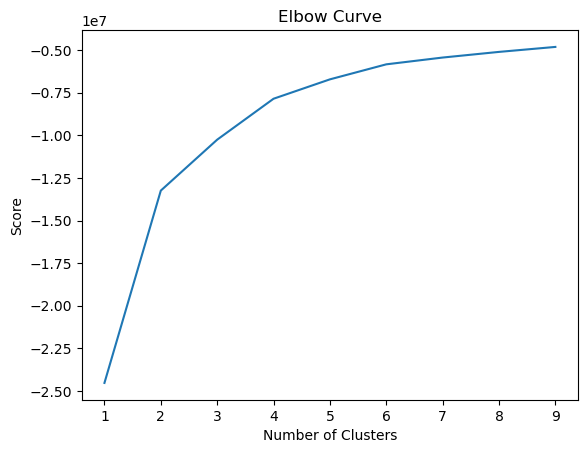

In [54]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

We see that the curve starts to slope between 2 and 3 on the x-axis, so I chose to work with 3 clustters.

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [57]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/pedropaulo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [58]:
df['clusters'] = kmeans.fit_predict(df)

/Users/pedropaulo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
df.head()

,start_hour,trip_duration,start_day,end_day,end_hour,clusters
0,18,18,9,9,18,0
1,18,38,12,12,18,1
2,19,44,18,18,19,2
3,11,54,28,28,12,2
4,18,8,7,7,18,0


In [60]:
df['clusters'].value_counts()

0    21897
2    14569
1    13534
Name: clusters, dtype: int64

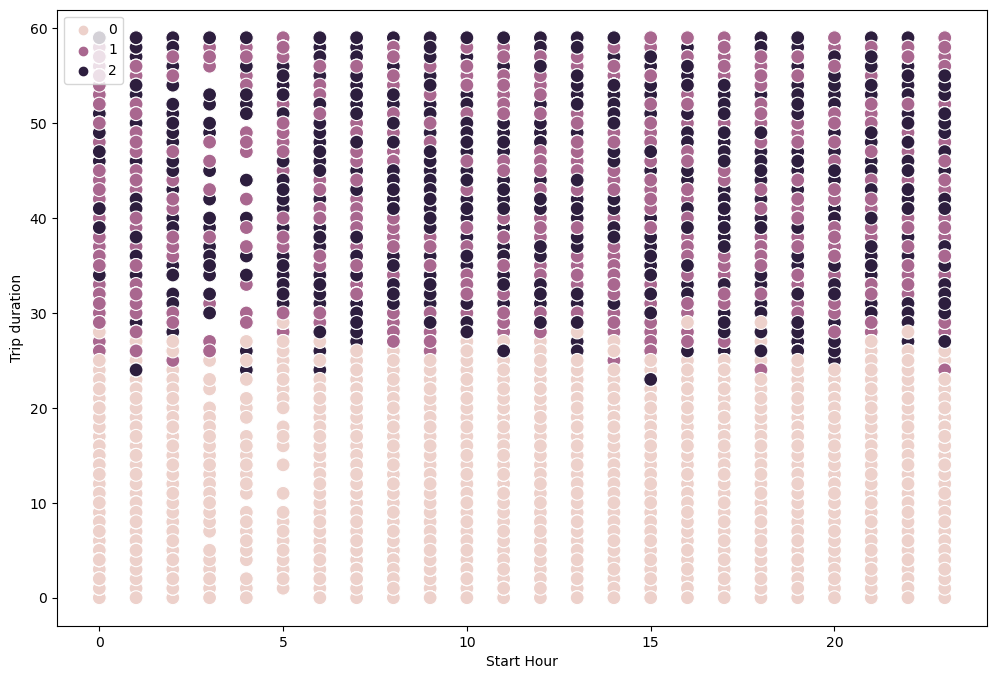

In [61]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Hour') # Label x-axis.
plt.ylabel('Trip duration') # Label y-axis.
plt.show()

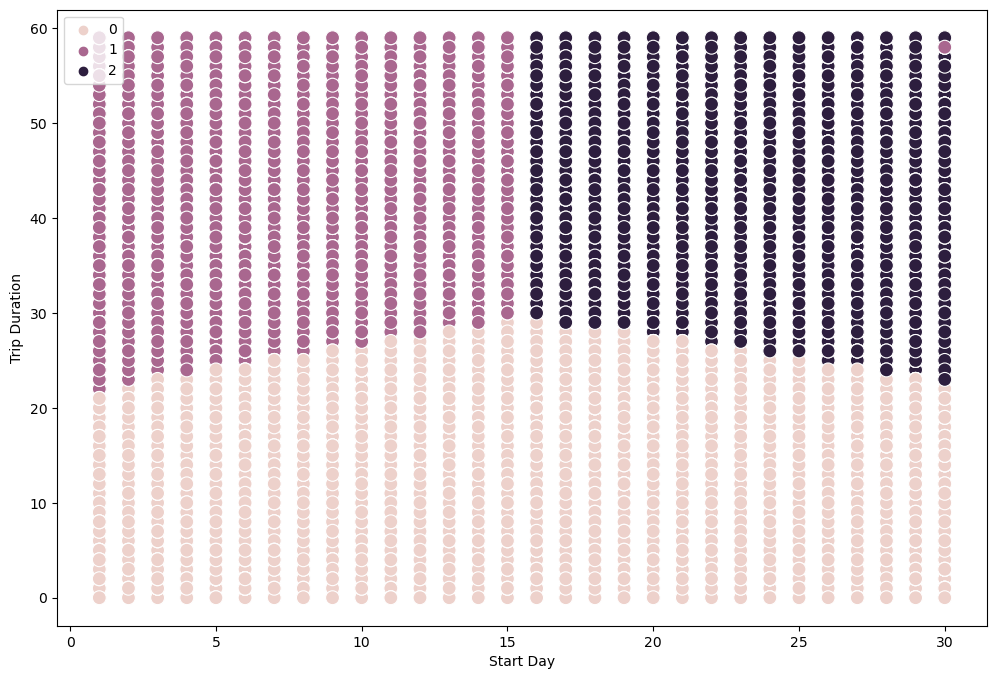

In [62]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_day'], y=df['trip_duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Start Day') 
plt.ylabel('Trip Duration') 
plt.show()

The graph does not show us a clear trend, however we see in clustter 0 that trip duration volume tends to increase in volume between days 10 and 20, which can give us an insight into the period of the month with the highest trip volume above 20 min.

In [63]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [64]:
df.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'end_hour':['mean', 'median'], 
                         'start_day':['mean', 'median'],
                          'trip_duration':['mean', 'median']})

start_hour          end_hour         start_day         \
                  mean median       mean median       mean median   
cluster                                                             
dark purple  13.891482   15.0  14.178942   15.0  23.279635   24.0   
pink         14.434854   15.0  14.455405   15.0  16.033475   16.0   
purple       13.949830   15.0  14.207773   15.0   8.090882    8.0   

            trip_duration         
                     mean median  
cluster                           
dark purple     42.755302   43.0  
pink            12.782116   13.0  
purple          42.705039   43.0

The dark purple and purple group shows us more interesting data, seeing that it has the highest average trip duration, which means more profitable trips.